## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-010-04-Evolutionary-Algorithm-01

## Part A - Load the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part B - Setup the parameters

In [2]:
DNA_SIZE = 1             # DNA (real number)
DNA_BOUND = [0, 5]       # solution upper and lower bounds
N_GENERATIONS = 200
POP_SIZE = 100           # population size
N_KID = 50               # n kids per generation

## Part C - Requirement is to find the maximum of this function

In [3]:
def F(x): return np.sin(10*x)*x + np.cos(2*x)*x 

## Part D - Find non-zero fitness for selection

In [4]:
def get_fitness(pred): return pred.flatten()

## Part E - Spawn new population member

In [5]:
def make_kid(pop, n_kid):
    # generate empty kid holder
    kids = {'DNA': np.empty((n_kid, DNA_SIZE))}
    kids['mut_strength'] = np.empty_like(kids['DNA'])
    for kv, ks in zip(kids['DNA'], kids['mut_strength']):
        # crossover (roughly half p1 and half p2)
        p1, p2 = np.random.choice(np.arange(POP_SIZE), size=2, replace=False)
        cp = np.random.randint(0, 2, DNA_SIZE, dtype=np.bool)  # crossover points
        kv[cp] = pop['DNA'][p1, cp]
        kv[~cp] = pop['DNA'][p2, ~cp]
        ks[cp] = pop['mut_strength'][p1, cp]
        ks[~cp] = pop['mut_strength'][p2, ~cp]

        # mutate (change DNA based on normal distribution)
        ks[:] = np.maximum(ks + (np.random.rand(*ks.shape)-0.5), 0.)    # must > 0
        kv += ks * np.random.randn(*kv.shape)
        kv[:] = np.clip(kv, *DNA_BOUND)    # clip the mutated value
    return kids

## Part F - Extinct unfit population member

In [6]:
def kill_bad(pop, kids):
    # put pop and kids together
    for key in ['DNA', 'mut_strength']:
        pop[key] = np.vstack((pop[key], kids[key]))

    fitness = get_fitness(F(pop['DNA']))            # calculate global fitness
    idx = np.arange(pop['DNA'].shape[0])
    good_idx = idx[fitness.argsort()][-POP_SIZE:]   # selected by fitness ranking (not value)
    for key in ['DNA', 'mut_strength']:
        pop[key] = pop[key][good_idx]
    return pop

## Part G - Generate a population

In [7]:
pop = dict(DNA=5 * np.random.rand(1, DNA_SIZE).repeat(POP_SIZE, axis=0),   # initialize the population DNA values
           mut_strength=np.random.rand(POP_SIZE, DNA_SIZE))                # initialize the population mutation strength

## Part H - Evolve the generations

In [8]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

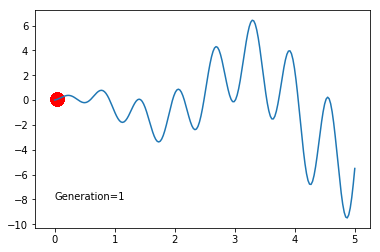

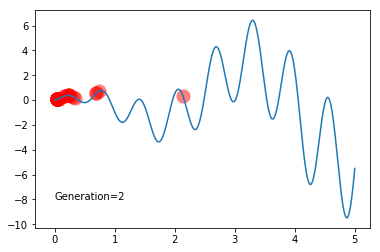

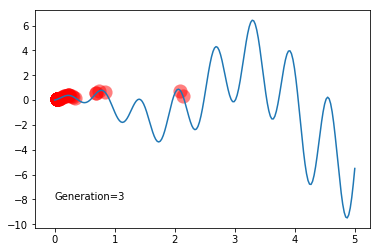

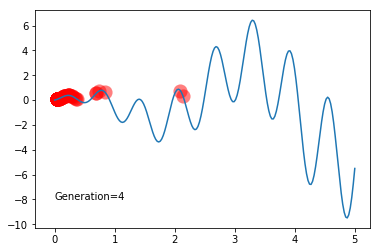

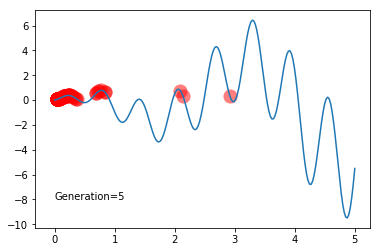

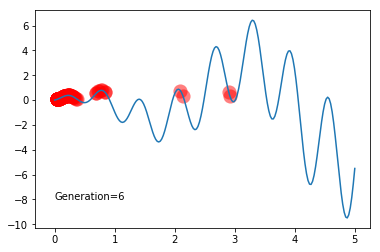

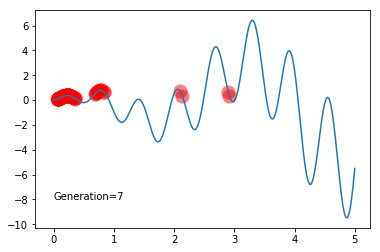

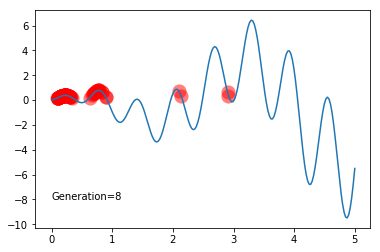

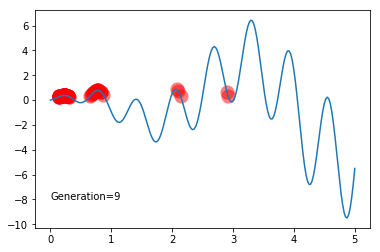

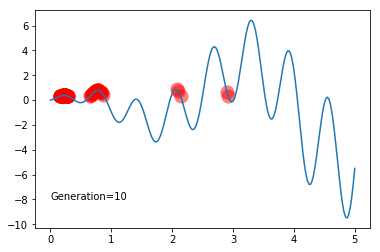

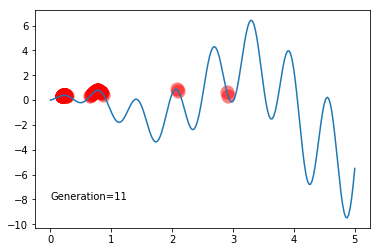

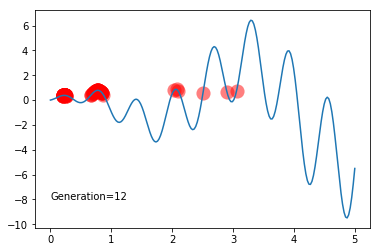

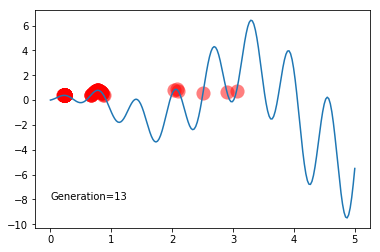

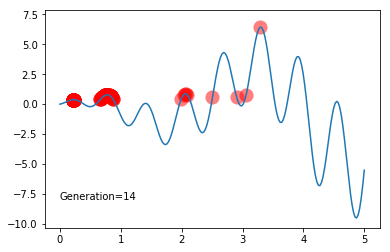

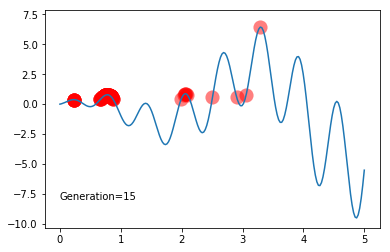

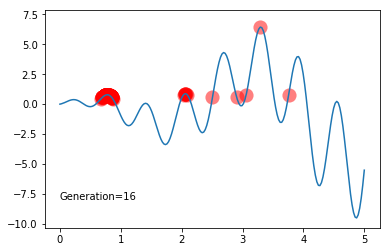

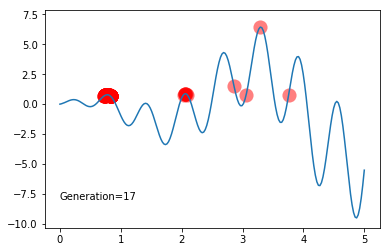

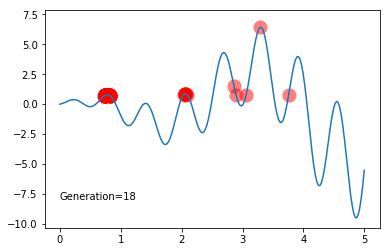

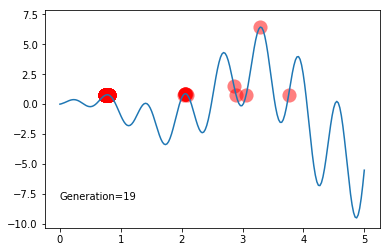

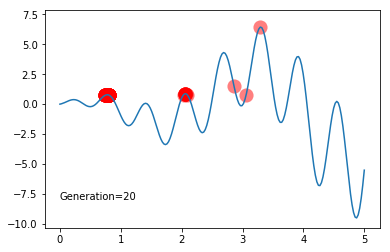

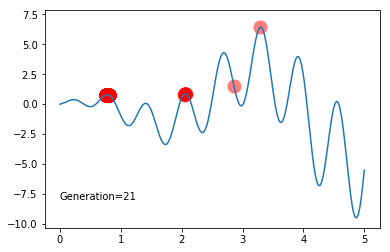

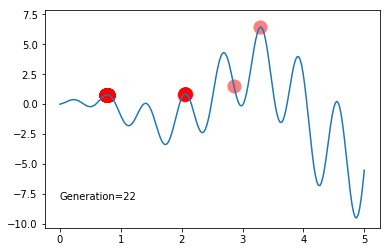

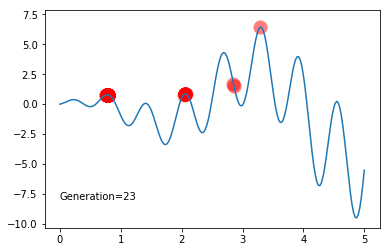

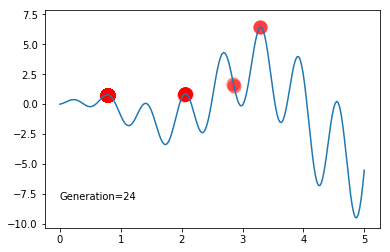

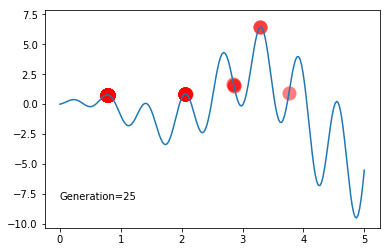

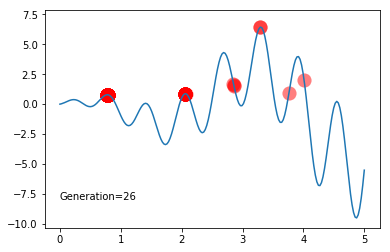

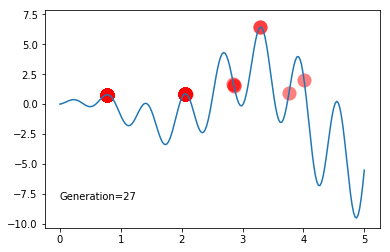

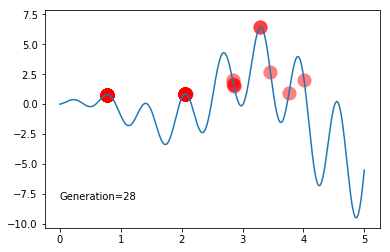

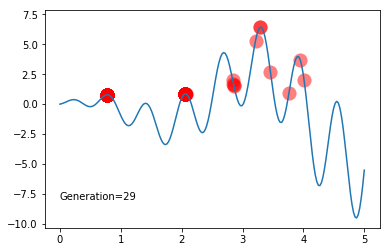

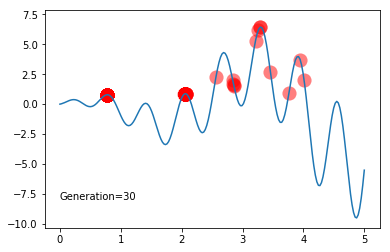

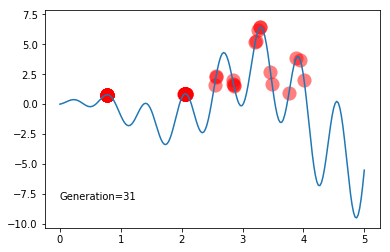

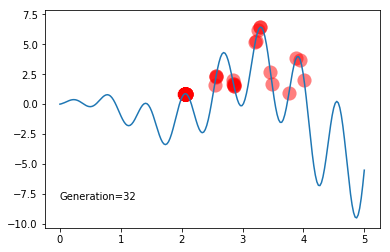

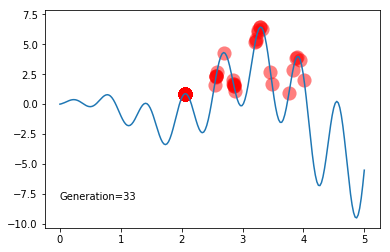

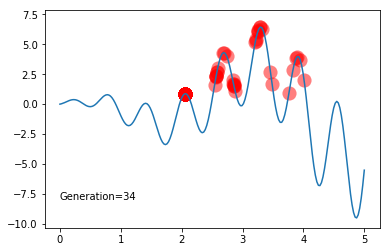

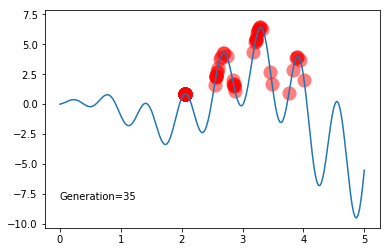

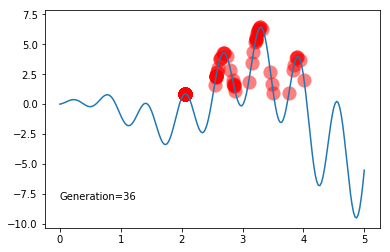

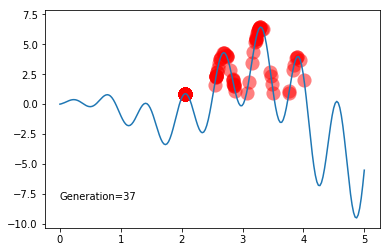

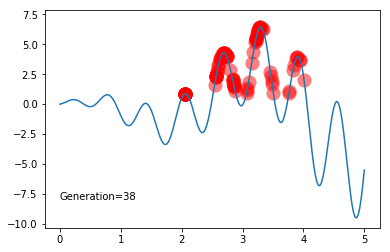

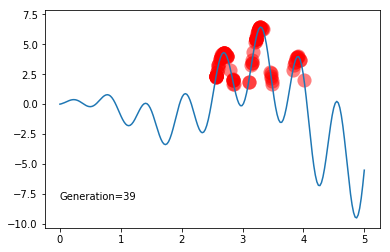

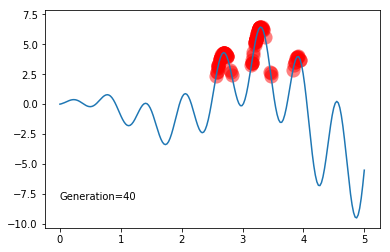

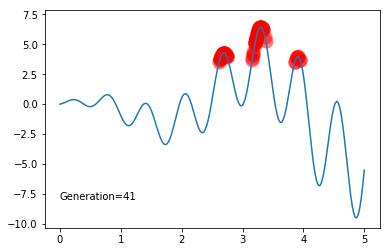

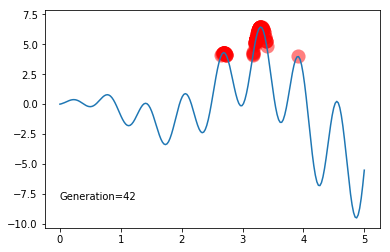

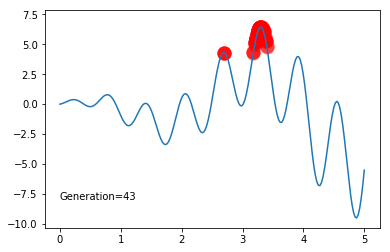

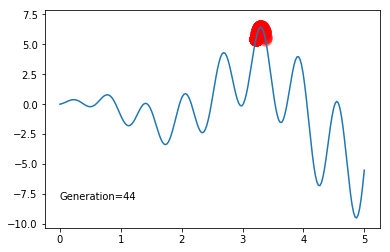

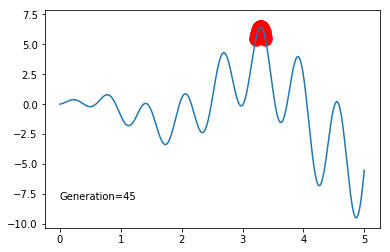

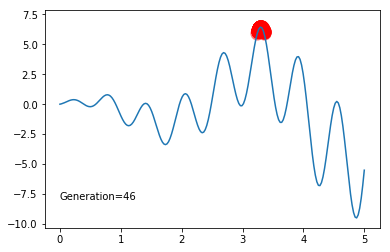

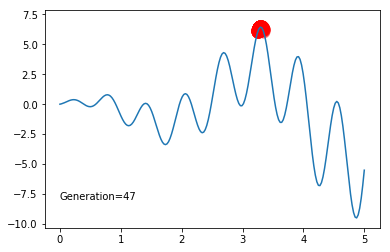

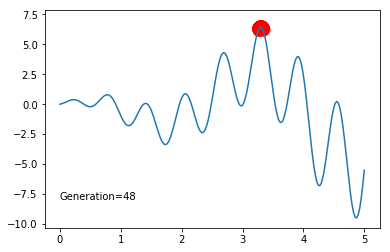

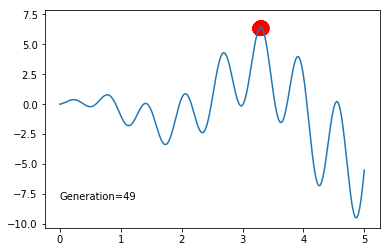

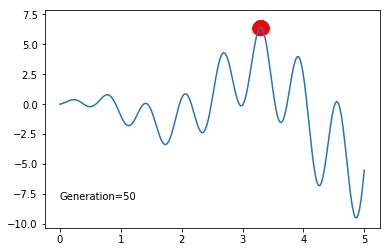

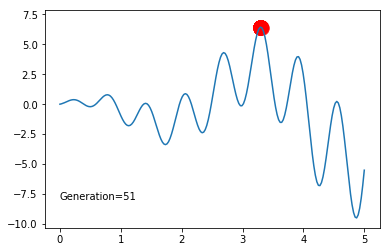

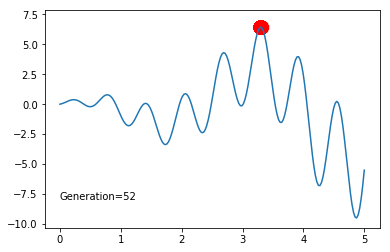

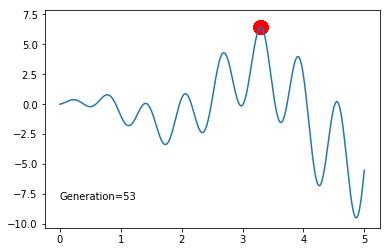

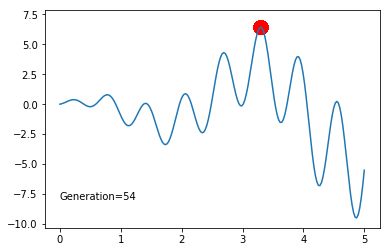

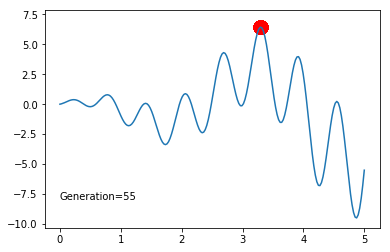

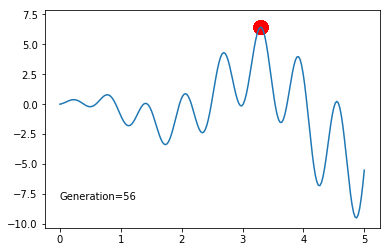

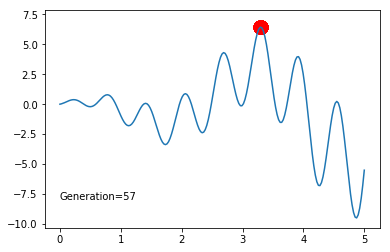

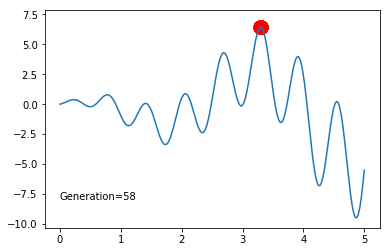

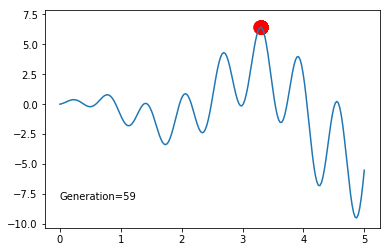

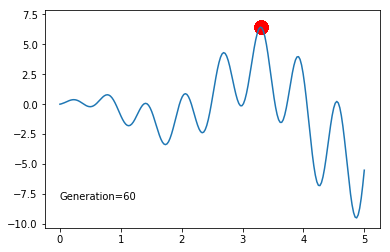

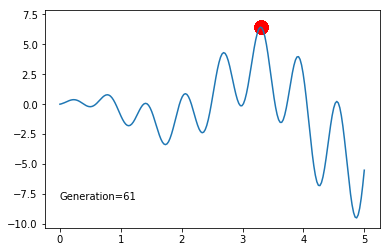

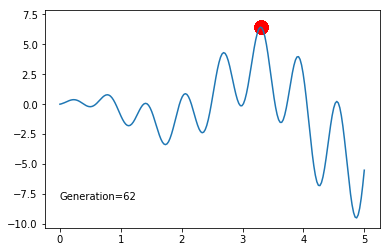

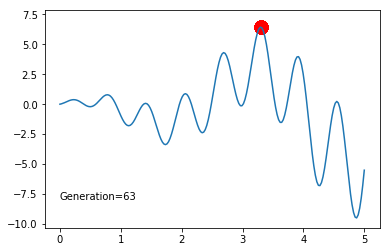

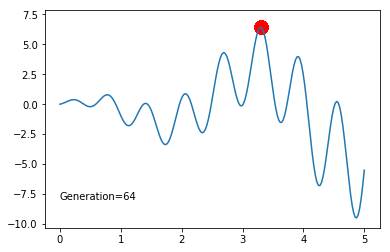

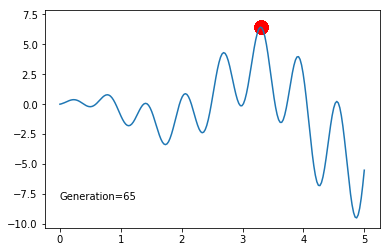

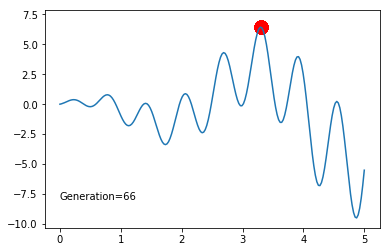

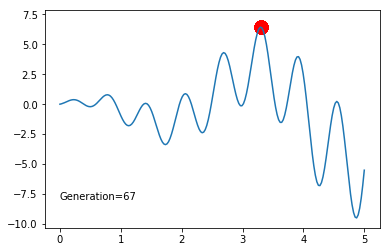

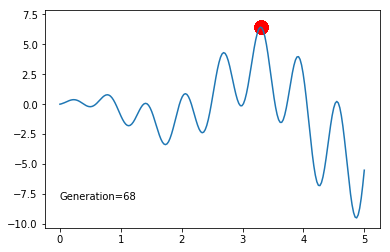

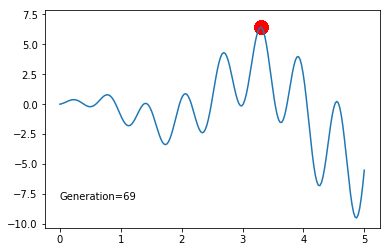

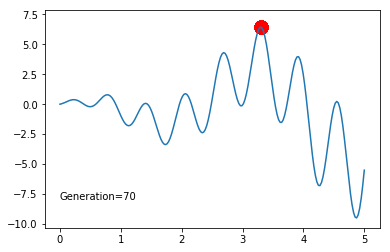

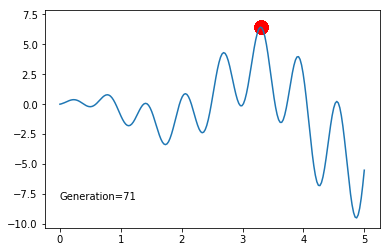

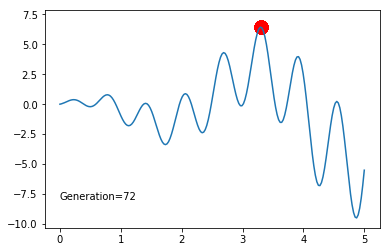

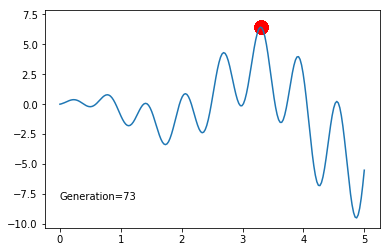

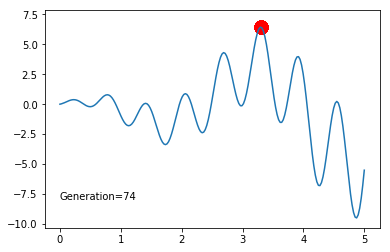

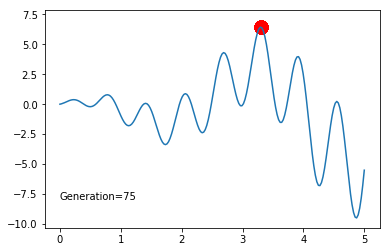

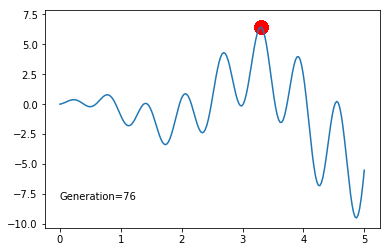

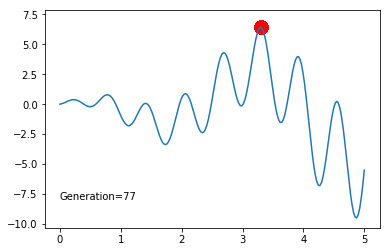

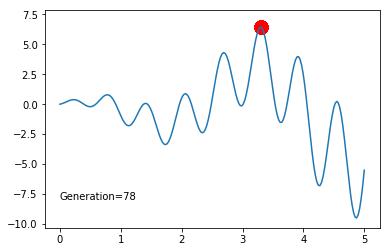

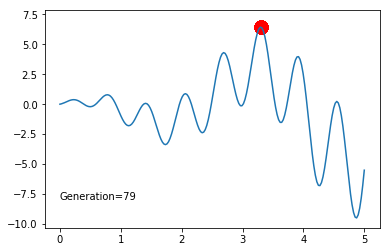

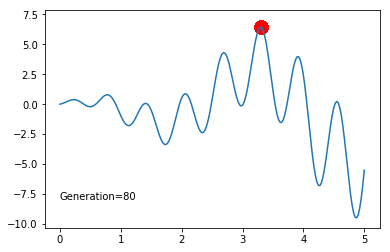

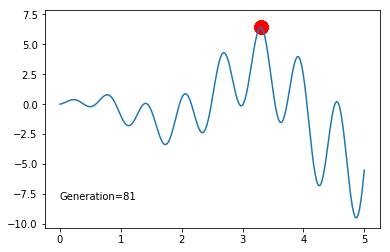

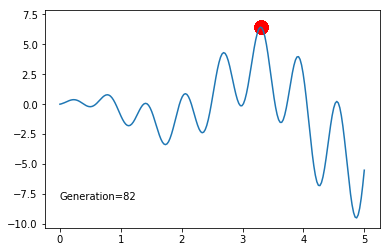

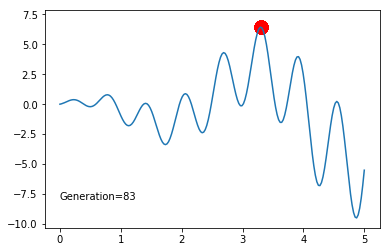

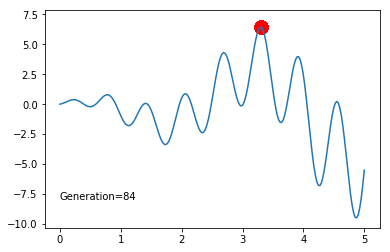

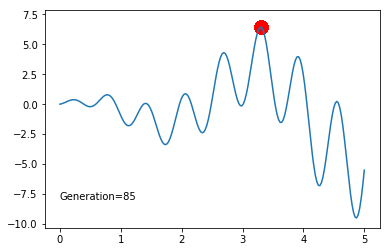

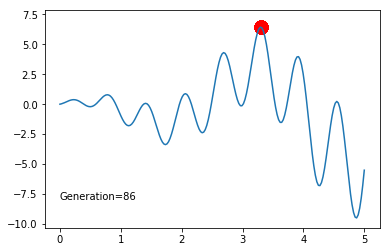

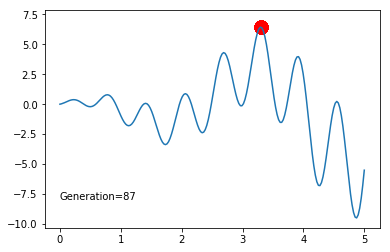

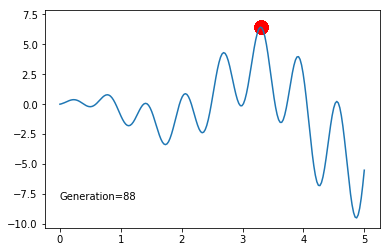

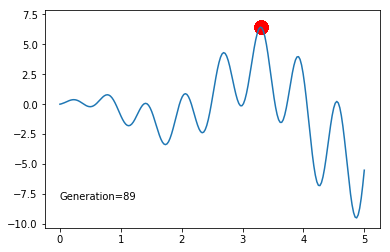

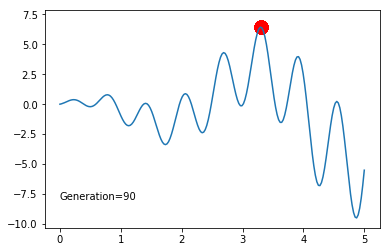

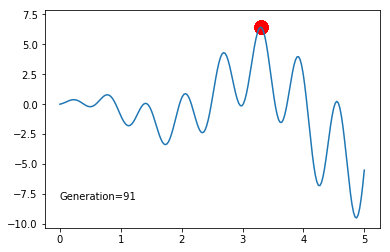

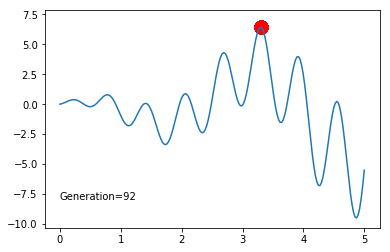

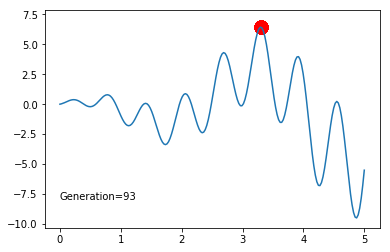

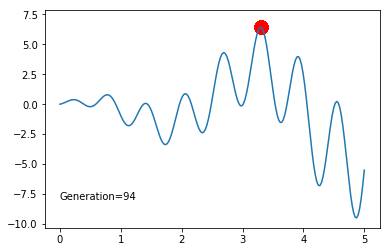

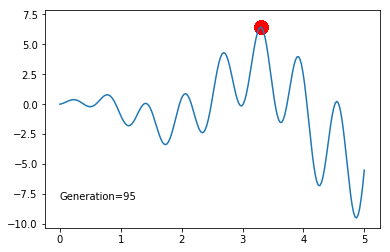

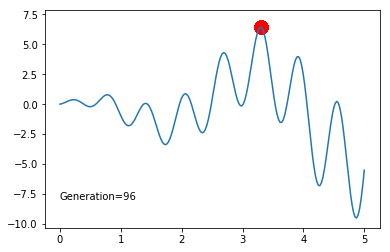

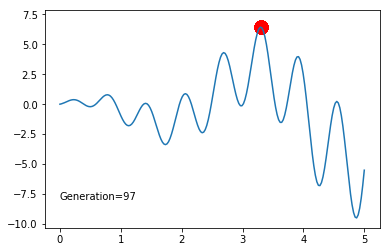

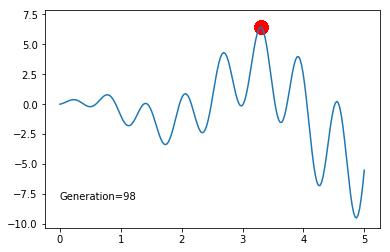

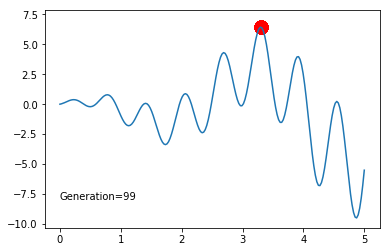

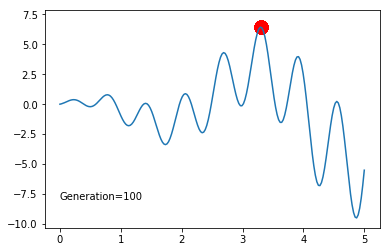

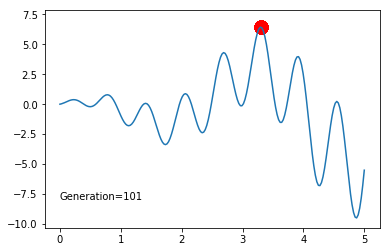

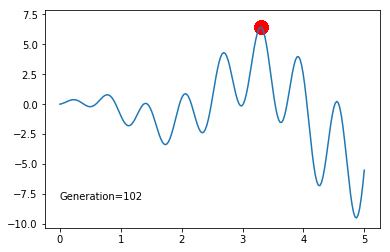

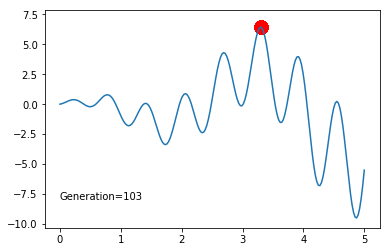

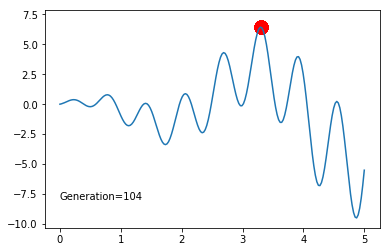

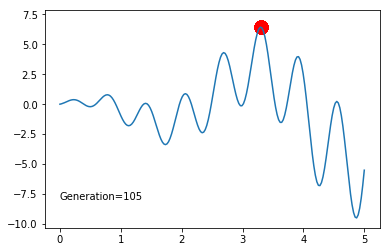

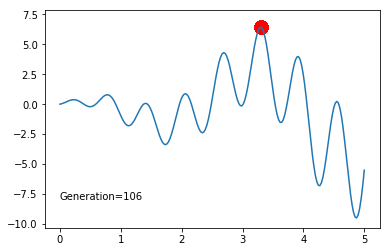

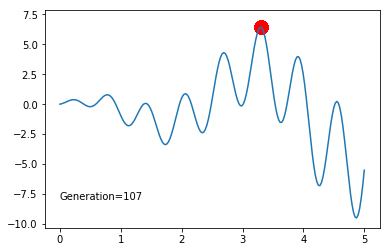

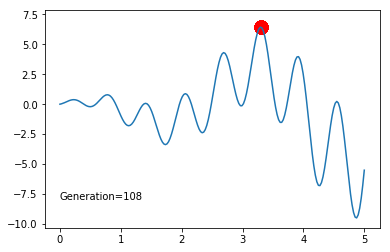

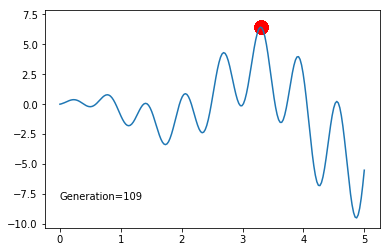

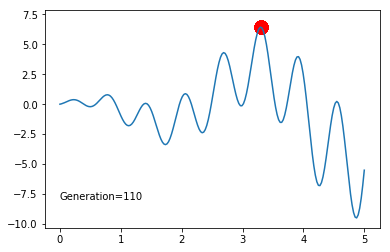

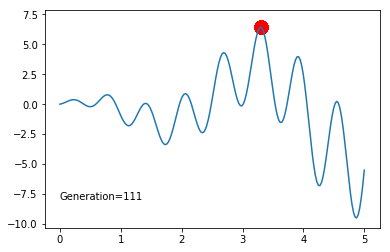

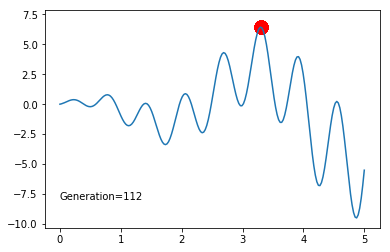

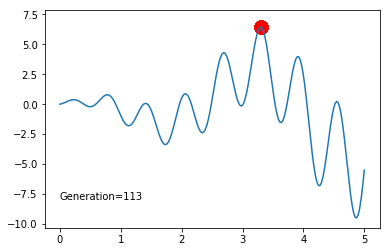

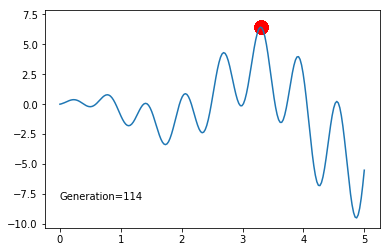

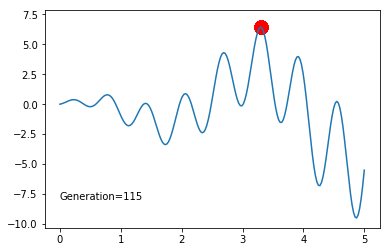

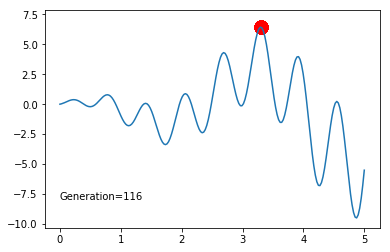

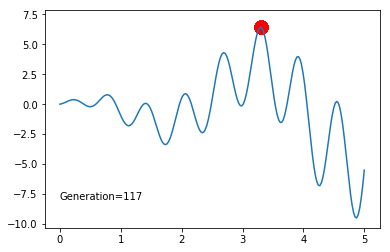

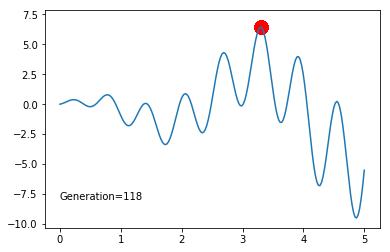

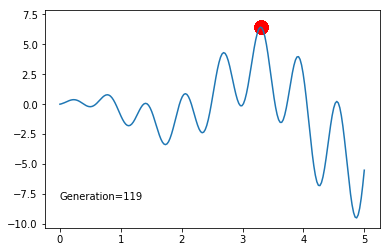

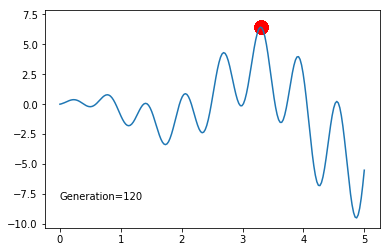

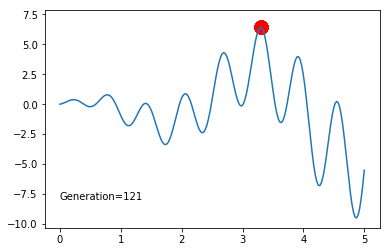

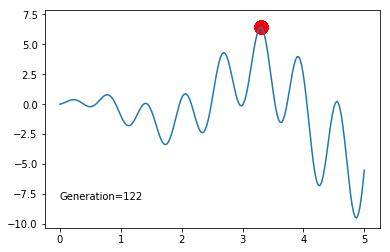

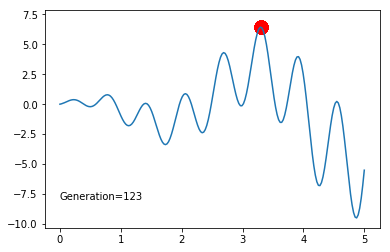

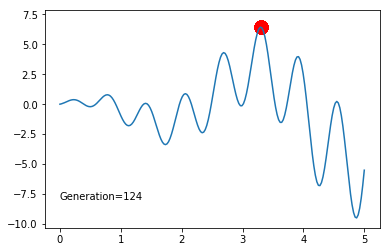

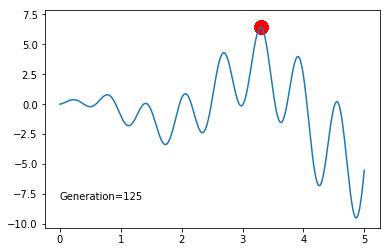

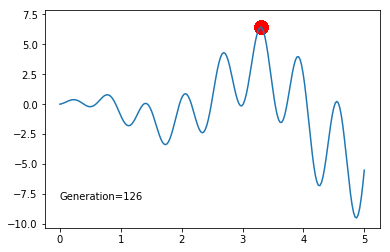

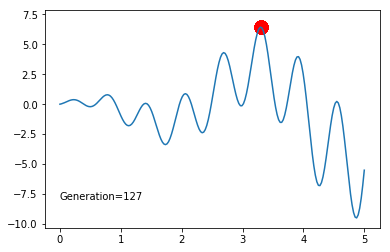

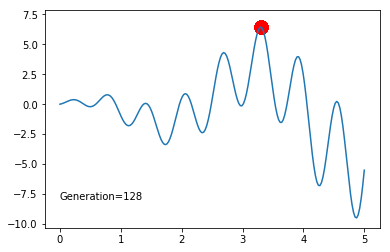

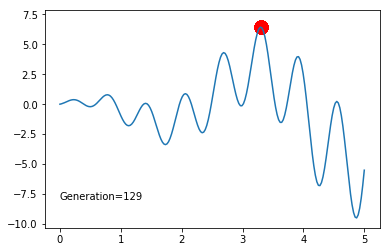

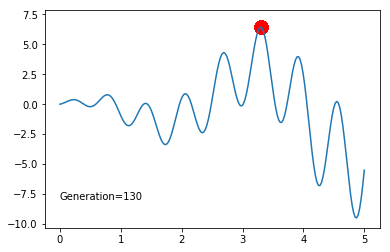

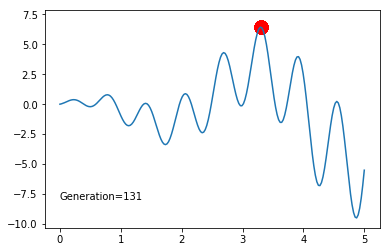

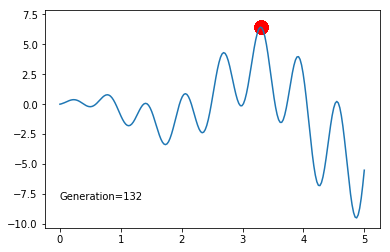

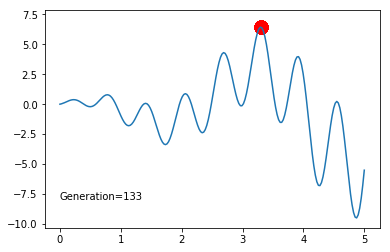

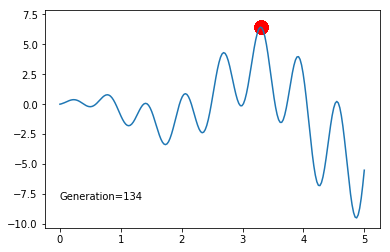

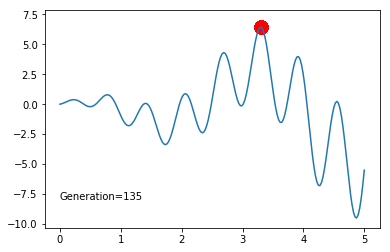

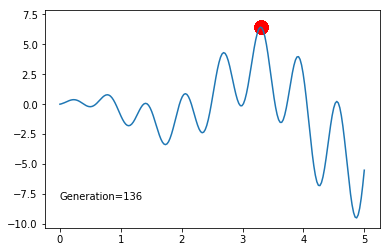

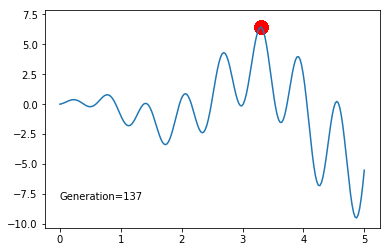

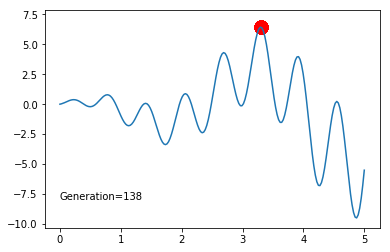

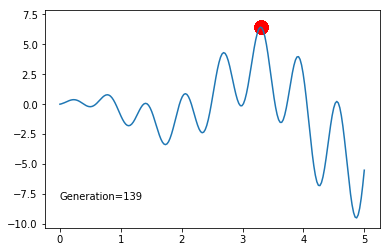

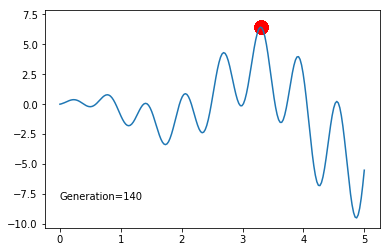

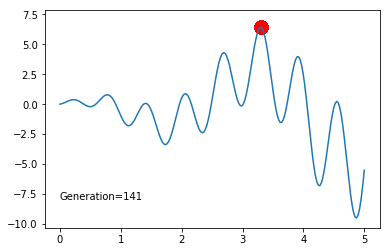

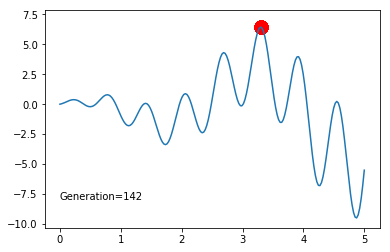

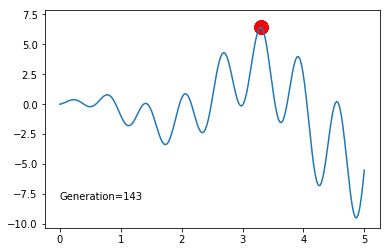

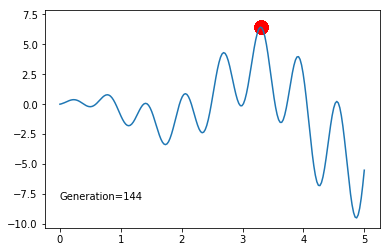

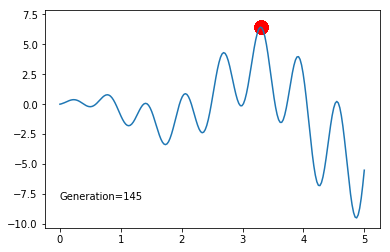

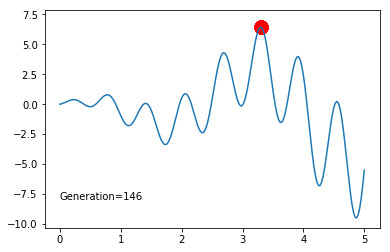

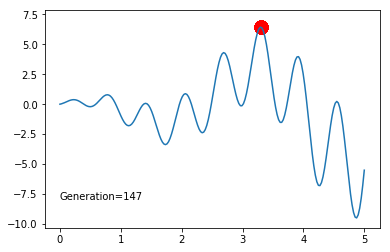

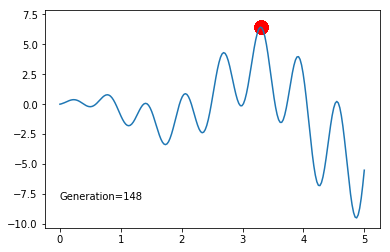

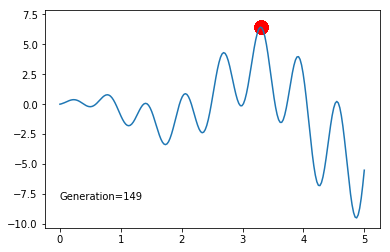

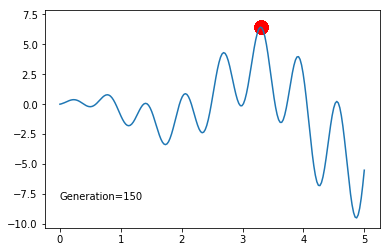

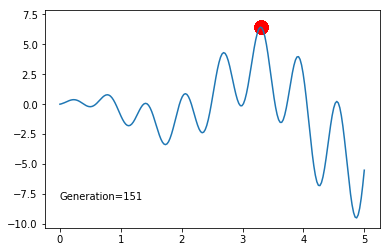

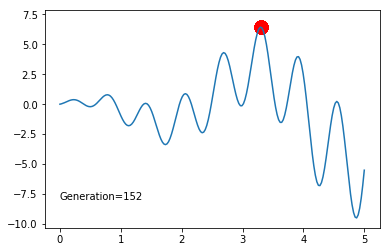

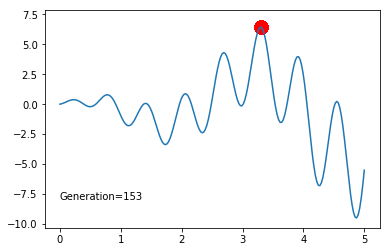

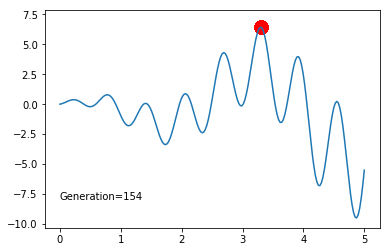

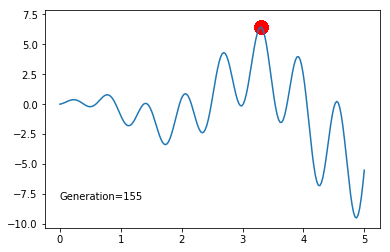

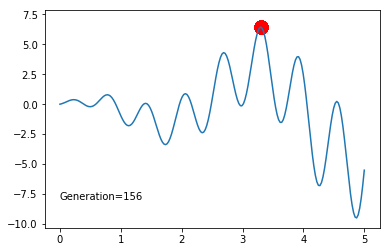

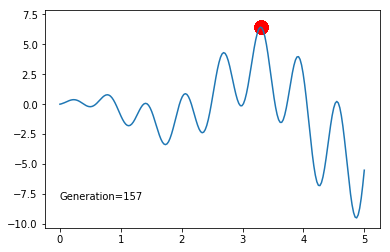

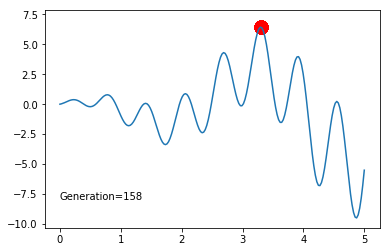

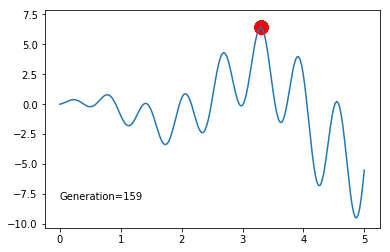

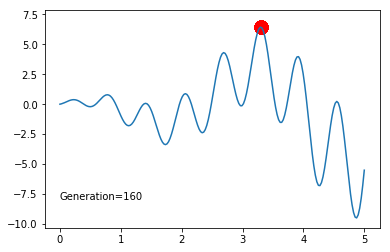

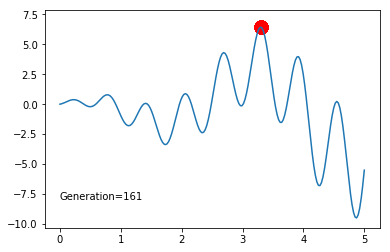

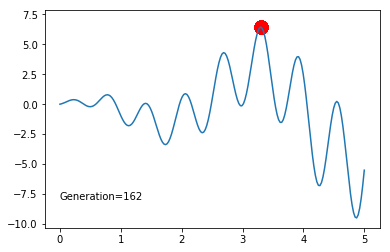

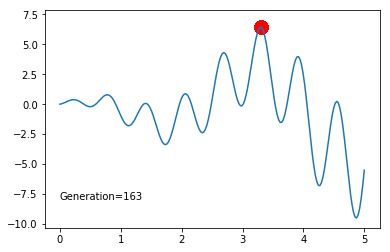

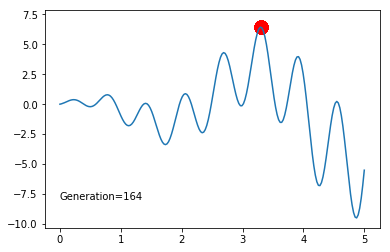

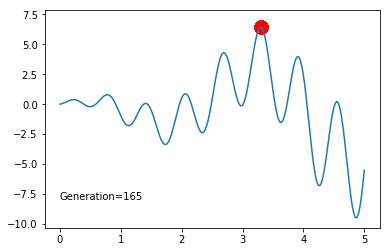

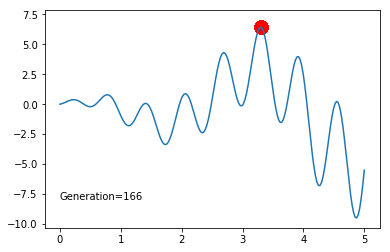

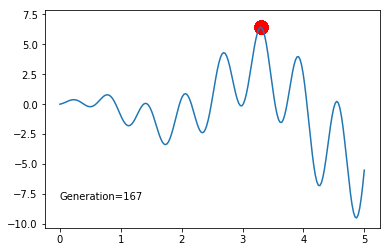

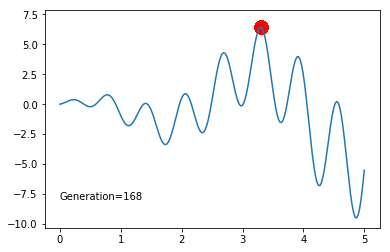

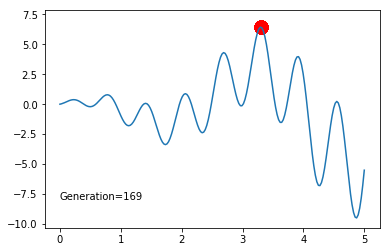

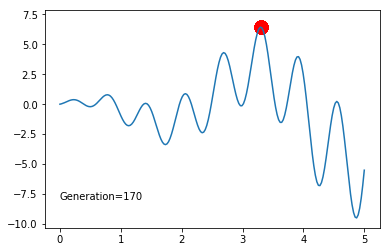

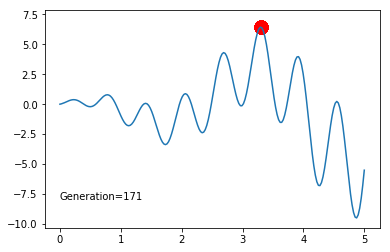

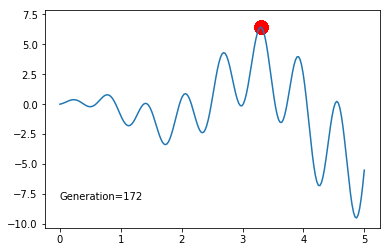

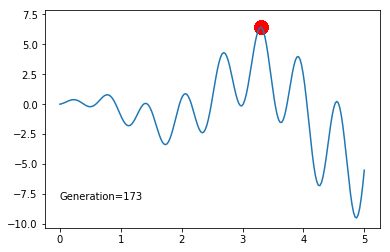

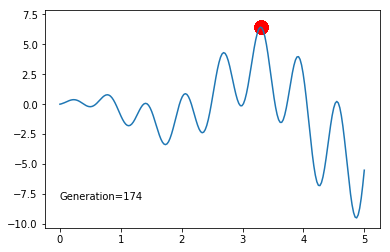

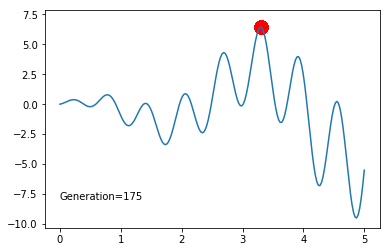

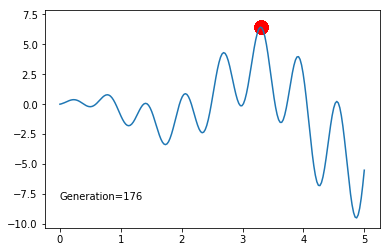

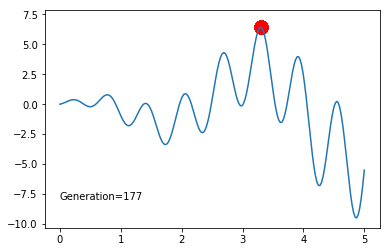

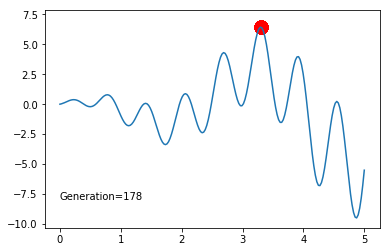

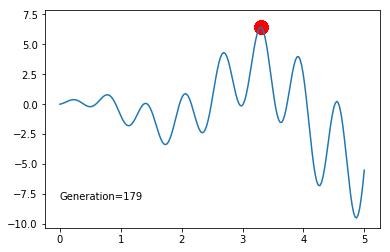

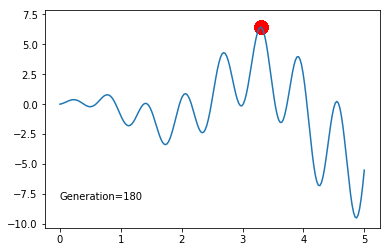

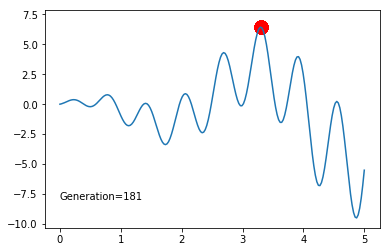

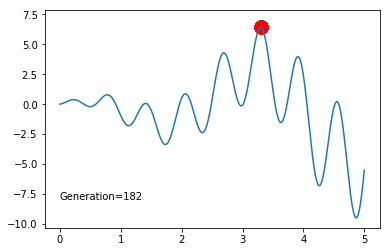

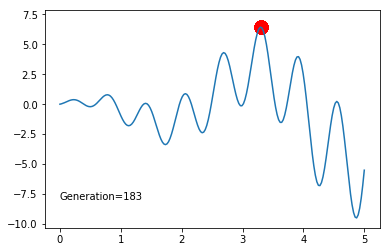

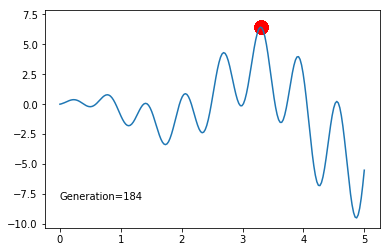

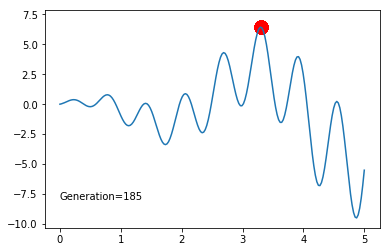

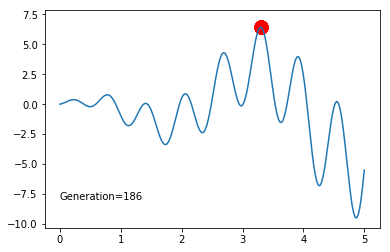

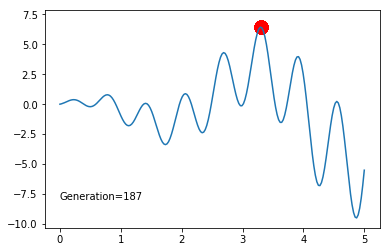

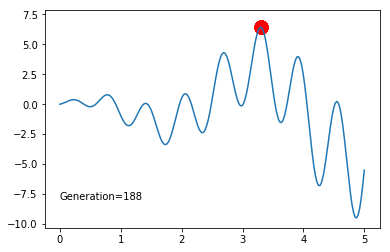

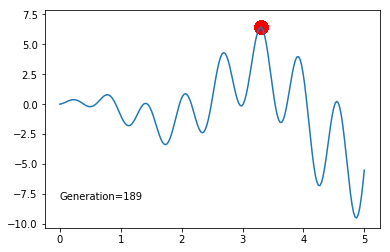

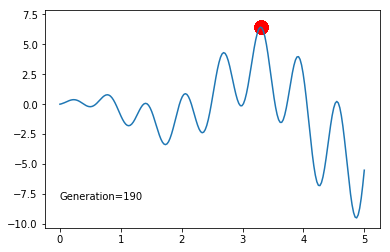

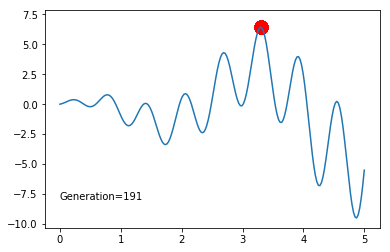

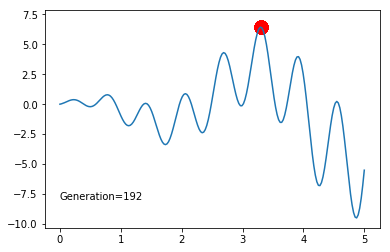

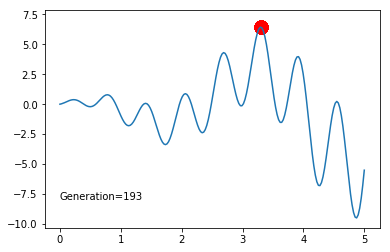

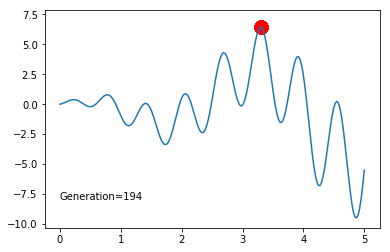

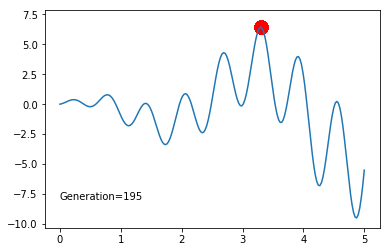

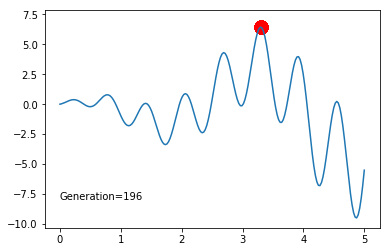

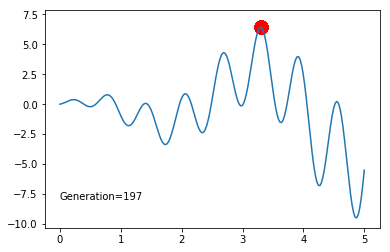

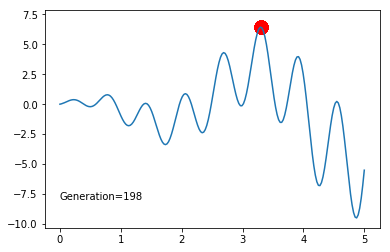

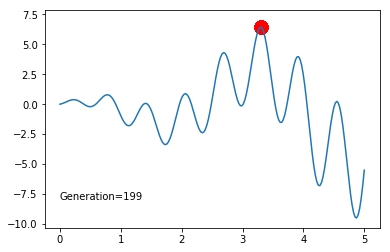

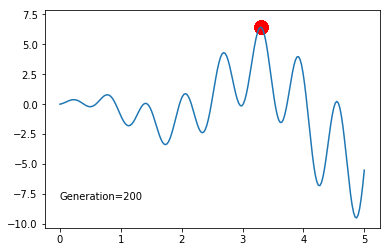

In [9]:
%matplotlib inline
plt.ion()       
x = np.linspace(*DNA_BOUND, 200)
for g in range(N_GENERATIONS):
    plt.plot(x, F(x))
    plt.scatter(pop['DNA'], F(pop['DNA']), s=200, lw=0, c='red', alpha=0.5)
    plt.text(0, -8, 'Generation=%.0f' % (g+1))
    plt.pause(0.05)

    kids = make_kid(pop, N_KID)
    pop = kill_bad(pop, kids)   # Good Parent for Elitism fitness selection

plt.ioff()
plt.show()


## Done

In [10]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-27 12:33:45.710123
